In [1]:
from manim import *

Manim Community v0.15.2

# Cámaras móviles

En Manim, es posible manipular la posición de la cámara en escenas 2D y, adicionalmente, el ángulo de la cámara en escenas 3D. Esto se logra usando las clases `MovingCamera` y `ThreeDCamera`, respectivamente, las cuales son subclases de una clase más general, llamada simplemente `Camera`.

## Introducción a la clase [`Camera`](https://docs.manim.community/en/stable/reference/manim.camera.camera.Camera.html#manim.camera.camera.Camera)

Veamos qué información nos puede dar Python sobre la clase `Camera`, ejecutando la siguiente celda:

In [17]:
Camera?

Del `Init signature`, vemos que no es necesario dar el valor de ningún parámetro para inicializar un objeto de esta clase, pues todos sus parámetros tienen valores predeterminados.

### Variables importantes de `Camera`

Ahora, en `Docstring`, vemos que la clase `Camera` se encarga de determinar exactamente qué se muestra en pantalla en cualquier momento dado. Además, se menciona que dos variables de configuración importantes al inicializar un objeto de la clase `Camera` son `background_image` y `pixel_height`.

#### La variable `background_image`

A la variable `background_image` de `Camera` le podemos asignar un _string_ que contenga la dirección (preferentemente absoluta) del archivo de imagen que queremos usar para el fondo:

In [5]:
%%manim -qm -v WARNING BackgroundImage

class BackgroundImage(Scene):                                                                                                  
    def construct(self):
        self.camera.background_image = "/home/diek/Pictures/Creación_álgebra_lineal.png"
        self.wait() # ¡HACER QUE FUNCIONE ESTE EJEMPLO!

#### La variable pixel_height

Recordemos brevemente las cuatro opciones de calidad introducidas en el _notebook_ `0.Instalación_y_uso_básico_de_Manim.ipynb`:

* `-ql` (_quality low_) calidad baja: resolución de 480p (640x480 pixeles);
* `-qm` (_quality medium_) calidad media: resolución de 720p (1080x720 pixeles);
* `-qh` (_quality high_) calidad alta: resolución de 1080p (1920x1080 pixeles);
* `-qk` (_quality 4k_) calidad 4k (3840 × 2160 pixeles).

Los valores que le podemos asignar a la variable `pixel_height` son números de tipo `int` que dependen de la opción de calidad que usemos para _renderizar_ nuestra escena, pues pueden ir desde `1` hasta el número máximo de pixeles verticales de la resolución correspondiente a la opción que hayamos elegido. La asignación de un valor válido a `pixel_height` cambiará el rango de pixeles verticales utilizados -empezando de arriba hacia abajo- para generar la animación.

Como ejemplo, la siguiente celda genera una "animación" (estática) de un cuadrado que abarca casi todo el rango de 720 pixeles verticales, correspondiente a la opción de calidad utilizada (`-qm`):

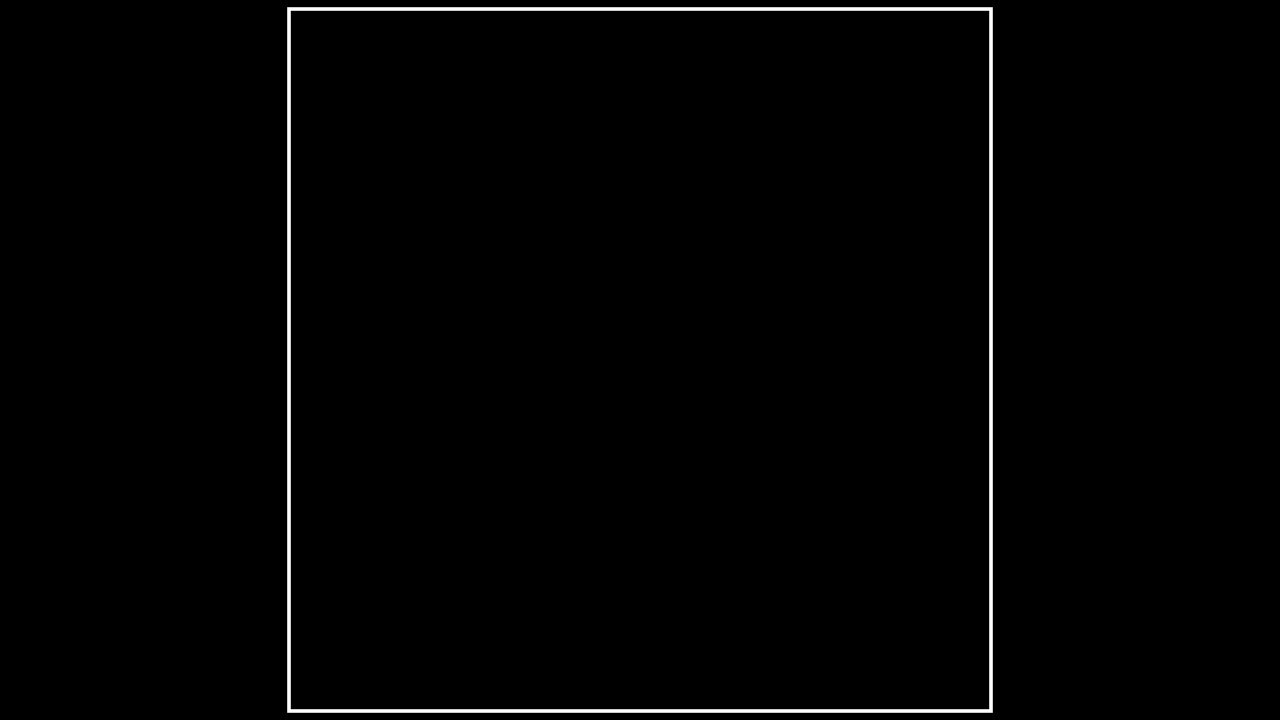

In [23]:
%%manim -qm -v WARNING Box

class Box(Scene):                                                                                                  
    def construct(self):
        square = Square().scale(3.9)
        self.add(square)

Ahora, vamos a asignarle otro valor `x` (que debe ser de tipo `int`) a la variable `pixel_height` de `Camera` con la sintáxis

`self.camera.pixel_height = x`,

donde recordamos que `self` se refiere a la instancia de la _clase correspondiente a la animación_ (en el ejemplo de la siguiente celda, `AdjustPixelHeight`):

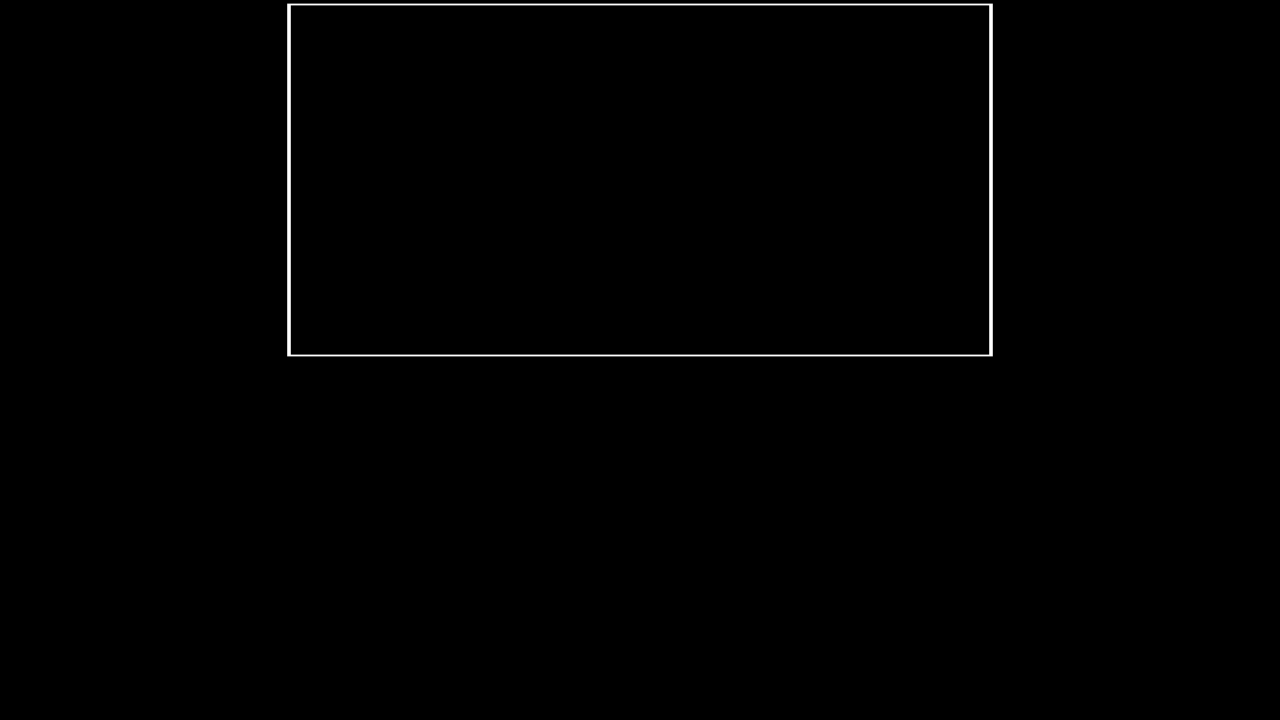

In [29]:
%%manim -qm -v WARNING AdjustPixelHeight

class AdjustPixelHeight(Scene):                                                                                                  
    def construct(self):
        square = Square().scale(3.9)
        self.add(square)
        self.camera.pixel_height = 360
        
# Intenta cambiar el valor de "self.camera.pixel_height" por
# alguno en el rango de enteros de 1 a 720.

# Luego, experimenta cambiando la opción "-qm" por otras opciones
# de calidad, así como el valor de "self.camera.pixel_height" por
# valores en los rangos correspondientes.

### Atributos de `Camera`

Los únicos atributos de la clase `Camera` son `background_color` y `background_opacity`. Al atributo `background_color` le podemos asignar un _string_ de código hexadecimal que fija el color de fondo (Manim ya tiene asignados _strings_ de este tipo a algunas variables globales como `BLUE`, `RED`, etcétera): 

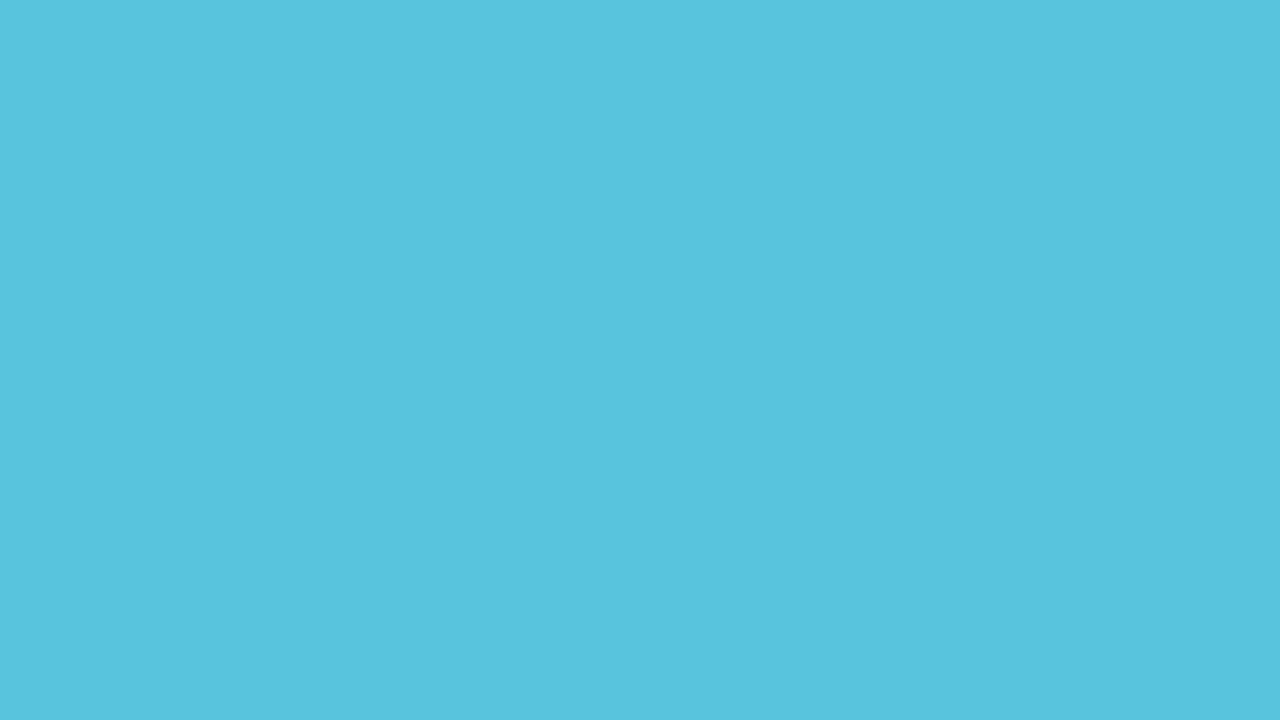

In [7]:
%%manim -qm -v WARNING BackgroundColor

class BackgroundColor(Scene):                                                                                                  
    def construct(self):
        self.camera.background_color = BLUE # Fondo azul

Por otro lado, al atributo `background_opacity` le podemos asignar un número entre `0` y `1`, donde `1` denota un color totalmente opaco y `0`, uno totalmente transparente: 

In [8]:
%%manim -qm -v WARNING BackgroundColorOpacity

class BackgroundColorOpacity(Scene):                                                                                                  
    def construct(self):
        self.camera.background_color = BLUE  # Fondo azul,
        self.wait()                          # esperamos un segundo;
        self.camera.background_opacity = 0.5 # cambiamos la opacidad,
        self.wait()                          # esperamos un segundo.
        self.camera.background_opacity = 0   # transparentamos,
        self.wait()                          # esperamos un segundo.

**Nota** Según el `Init signature` de la clase `Camera`, el valor predeterminado de `background_image` es `None`, lo cual puede parecer extraño. Sin embargo, el código fuente revela qué realmente sucede al inicializar un objeto de la clase `Camera` utilizando este valor predeterminado (es decir, sin especificar un valor para la variable `background_image`): la [definición del método](https://docs.manim.community/en/stable/_modules/manim/camera/camera.html#Camera.init_background) `init_background` de la clase `Camera` nos muestra que se crea un fondo con los valores de los atributos de color `background_color` y opacidad `background_opacity` del **objeto de configuración global** `config`:

In [8]:
config.background_color, config.background_opacity

(<Color black>, 1.0)

Por esto es que, en la escena `BackgroundColorOpacity` del ejemplo anterior, cuando escribimos la línea

`self.camera.background_color = BLUE`,

la opacidad de dicho color azul estaba fija en el valor `1.0`, y no cambió hasta que lo modificamos explícitamente. Más aún, cuando cambiamos la opacidad a `0` y transparentamos nuestro color por completo, el fondo quedó con el valor predeterminado de la variable de `background_color`, `<Color black>` .

**Nota** El código fuente de la clase `Camera` se puede consultar [aquí](https://docs.manim.community/en/stable/_modules/manim/camera/camera.html#Camera).

### Métodos relevantes de `Camera`

Incluir métodos `background_color`, `background_opacity` y sus _setters_ correspondientes, así como los demás [métodos](https://docs.manim.community/en/stable/reference/manim.camera.camera.Camera.html#camera) que parezcan relevantes.

## Movimiento de cámara en 2D con las clases [`Scene -> MovingCameraScene`](https://docs.manim.community/en/stable/reference/manim.scene.moving_camera_scene.MovingCameraScene.html#manim.scene.moving_camera_scene.MovingCameraScene) y [`Camera -> MovingCamera`](https://docs.manim.community/en/stable/reference/manim.camera.moving_camera.MovingCamera.html#manim.camera.moving_camera.MovingCamera)

Para manipular la posición de la cámara en escenas 2D, se utiliza una subclase de `Camera` llamada `MovingCamera`; sin embargo, sólo es posible hacer esto si la animación que creamos es una subclase de `MovingCameraScene`:

In [154]:
%%manim -qm -v WARNING ZoomingCamera

class ZoomingCamera(MovingCameraScene):                                                                                                  
    def construct(self):
        text = Text("¡Me acerco y me alejo!")
        self.add(text)
        self.play(self.camera.frame.animate.set(width=6.5))
        self.play(self.camera.frame.animate.set(height=8))

En el ejemplo anterior, animamos (`.animate`) la forma en que fijamos (`.set`) los valores de ancho y altura del cuadro (`.frame`) de `MovingCamera` (`.camera`). Cambia los valores asignados a `width` y `height` y observa qué pasa. Nota que, si cambias la clase `MovingCameraScene` por `Scene`, te devolverá un error.

[código fuente](https://docs.manim.community/en/stable/_modules/manim/camera/moving_camera.html#MovingCamera). Investigar `auto_zoom`

### Usos _útiles_

Arreglar el encuadre de una escena.

### Subclases [`Scene -> MovingCameraScene -> ZoomedScene`](https://docs.manim.community/en/stable/reference/manim.scene.zoomed_scene.ZoomedScene.html#manim.scene.zoomed_scene.ZoomedScene) y [`Camera -> MovingCamera -> MultiCamera`](https://docs.manim.community/en/stable/reference/manim.camera.multi_camera.MultiCamera.html#manim.camera.multi_camera.MultiCamera)

## Movimiento de cámara en 3D con las clases [`Scene -> ThreeDScene`](https://docs.manim.community/en/stable/reference/manim.scene.three_d_scene.ThreeDScene.html#manim.scene.three_d_scene.ThreeDScene) y [`Camera -> ThreeDCamera`](https://docs.manim.community/en/stable/reference/manim.camera.three_d_camera.ThreeDCamera.html#manim.camera.three_d_camera.ThreeDCamera)

`ThreeDCamera` es la subclase de `Camera` predeterminada para cualquier escena de clase `Scene -> ThreeDScene`, como se puede ver en [esta definición](https://docs.manim.community/en/stable/reference/manim.scene.three_d_scene.ThreeDScene.html#manim.scene.three_d_scene.ThreeDScene).

## Recursos complementarios
* Video [Manim Tutorial - Moving Camera Scene](https://www.youtube.com/watch?v=QTlZp8tiql4).
* Primera mitad del video [3D Graphing, 3D Camera Movement, 3D Parametric Curves & Surfaces2D | Mastering Manim Chapter 5](https://www.youtube.com/watch?v=0YF9mkGkcgI) (de [0:00](https://www.youtube.com/watch?v=0YF9mkGkcgI&t=0s)-[7:41](https://www.youtube.com/watch?v=0YF9mkGkcgI&t=461s)).
* [Manual de referencia](https://docs.manim.community/en/stable/reference.html) de Manim.

# Laboratorio de experimentos

_¡No molestar, estoy experimentando!_ (Ignoren esta parte)

In [5]:
%%manim -qm -v WARNING ZoomingCamera

class ZoomingCamera(MovingCameraScene):                                                                                                  
    def construct(self):
        text = Text("¡Me acerco y me alejo!")
        self.add(text)
        self.play(self.camera.frame.animate.set(width=6.5))
        self.play(self.camera.frame.animate.set(height=8))

In [3]:
%%manim -qm -v WARNING MovingCamera

class MovingCamera(MovingCameraScene):
    def construct(self):
        text = Text("Texto").move_to(2.5 * LEFT)
        triang = Triangle().move_to(2.5 * RIGHT)
        self.add(text, triang)
        self.play(self.camera.frame.animate.move_to(text))
        self.play(self.camera.frame.animate.move_to(triang))
        self.play(self.camera.frame.animate.move_to(ORIGIN))

In [4]:
%%manim -qm -v WARNING SimultaneousZoomingAndMoving

class SimultaneousZoomingAndMoving(MovingCameraScene):
    def construct(self):
        text = Text("Texto").move_to(2.5 * LEFT)
        triang = Triangle().move_to(2.5 * RIGHT)
        self.add(text, triang)
        self.play(self.camera.frame.animate.move_to(text).set(width=6.5))
        self.play(self.camera.frame.animate.move_to(triang))
        self.play(self.camera.frame.animate.move_to(ORIGIN).set(height=8))

In [5]:
%%manim -qm -v WARNING ZoomedSceneExample

class ZoomedSceneExample(ZoomedScene):
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.5,
            zoomed_display_height=3,
            zoomed_display_width=4,
            zoomed_camera_config={
                "default_frame_stroke_width": 5,
                },
            **kwargs
        )

    def construct(self):
        texto = Text("Texto").scale(5)
        self.add(texto)
        
        # Inicializamos la segunda cámara ('zoomeada') como la variable zc
        zc = self.zoomed_camera
        
        # Creamos un marco con el texto "Frame" para el encuadre de zc
        zc_frame = zc.frame
        zc_frame.move_to(texto)
        zc_frame.set_color(YELLOW)
        frame_text = Text("Frame", color=YELLOW, font_size=50)
        frame_text.next_to(zc_frame, DOWN)
        
        # Mostramos el marco del encuadre de zc y el texto "Frame"
        self.play(Create(zc_frame))
        self.play(FadeIn(frame_text, shift=UP))
        
        # Inicializamos el "display" de zc
        zd = self.zoomed_display
        
        # Creamos un marco con el texto "Display" para el
        # encuadre del 'display' de zc
        zd_frame = zd.display_frame
        zd_frame.set_color(YELLOW)
        display_text = Text("Display", color=YELLOW, font_size=67)
        display_text.next_to(zd_frame, DOWN)

        # De esto aún no estoy seguro
        zd_rect = BackgroundRectangle(zd, fill_opacity=0)
        self.add_foreground_mobject(zd_rect)
        unfold_camera = UpdateFromFunc(zd_rect, lambda rect: rect.replace(zd))

        # Mostramos el encuadre del 'display' de zc (saliendo del encuadro
        # de zc) y el texto "Display"
        self.activate_zooming()                 # Activa el 'display' de zc        
        self.play(self.get_zoomed_display_pop_out_animation())
        self.play(FadeIn(display_text, shift=UP))
        
        # Borramos los textos "Frame" y "Display"
        self.play(FadeOut(display_text), FadeOut(frame_text))
        self.wait()
        
        # Hacemos zoom y movemos la segunda cámara (zc)
        self.play(zc_frame.animate.set(width = 0.75))
        self.play(zc_frame.animate.shift(2 * LEFT))
        self.play(zc_frame.animate.shift(4 * RIGHT))
        self.play(zc_frame.animate.shift(2 * LEFT).set(height = 1.5))
        self.wait()
        
        # Reescalamos y movemos el 'display' de la segunda cámara (zc)
        self.play(ScaleInPlace(zd, 1.2))           
        # Averiguar cómo mover el 'display' de zc sin afectar a zc
        # self.play(zd_frame.animate.shift(4 * DOWN))
        # self.wait()
        
        # Reescalamos el encuadre de zc y su 'display' por el mismo factor     
        scale_factor = [0.75, 0.6, 0] # [x, y, z]
        self.play(
            zc_frame.animate.scale(scale_factor),
            zd.animate.scale(scale_factor),
        )
        self.wait()
        
        # Averiguar cómo borrar el 'display' fácilmente
        
        self.play(Uncreate(zd_frame), FadeOut(zc_frame))
        self.wait()

In [6]:
%%manim -qm -v WARNING ThreeDCameraRotation

class ThreeDCameraRotation(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        circle=Circle()
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(circle,axes)
        self.begin_ambient_camera_rotation(rate=0.1)
        self.wait()
        self.stop_ambient_camera_rotation()
        self.move_camera(phi=75 * DEGREES, theta=30 * DEGREES)
        self.wait()

In [11]:
%%manim -qm -v WARNING ThreeDCameraIllusionRotation

class ThreeDCameraIllusionRotation(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        circle=Circle()
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(circle,axes)
        self.begin_3dillusion_camera_rotation(rate=2)
        self.wait(PI/2)
        self.stop_3dillusion_camera_rotation()

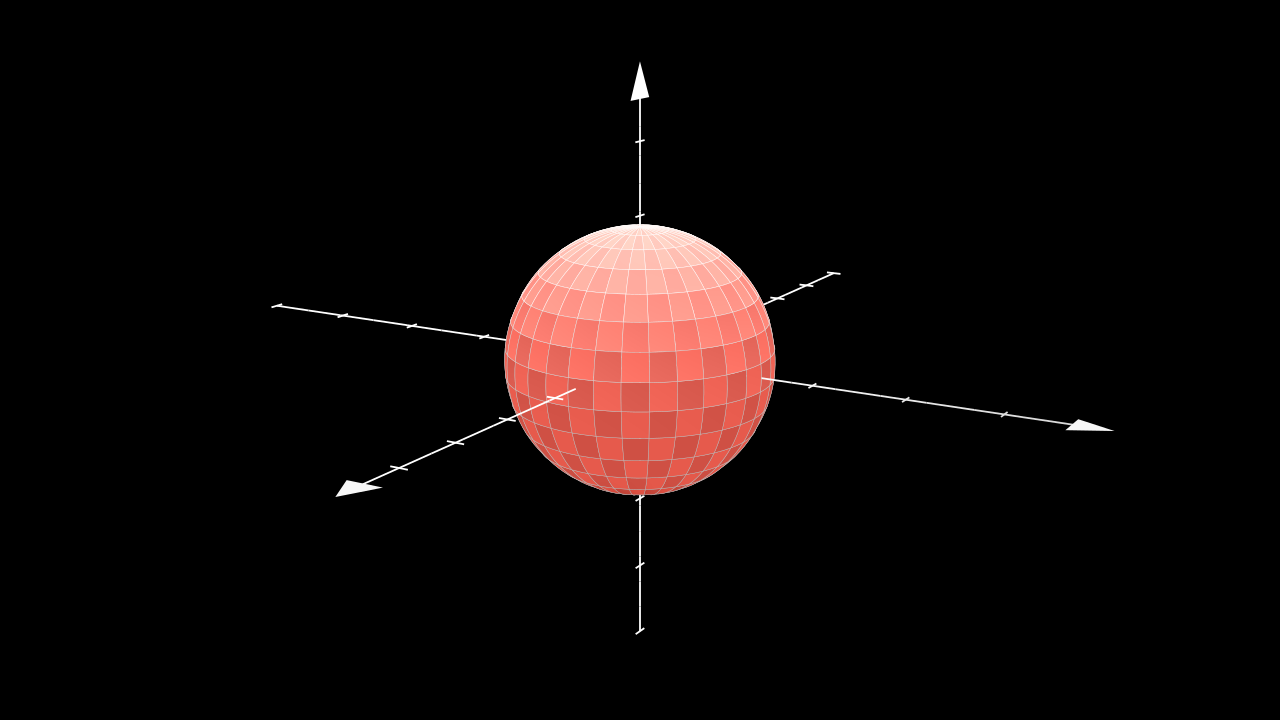

In [50]:
%%manim -qm -v WARNING ThreeDLightSourcePosition

class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Surface(
            lambda u, v: np.array([
                1.5 * np.cos(u) * np.cos(v),
                1.5 * np.cos(u) * np.sin(v),
                1.5 * np.sin(u)
            ]), v_range=[0, TAU], u_range=[-PI / 2, PI / 2],
            checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        )
        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)